# 1. Gere manualmente ("no braço") um dataset (array) com 10 elementos inteiros, tendo como média o valor 3 e como desvio padrão um valor próximo de 2. Desenhe o histograma para os dados gerados.

In [15]:
%matplotlib inline
import numpy as np
import math, os, sys
from sklearn import linear_model
from matplotlib import pyplot as plt
from mylibs import linear

In [16]:
x1 = np.array([1,1,1,2,2,3,5,2,6,7])

def somar(x1):
    soma = 0
    for v in x1:
        soma += v
    return soma

def media(x1):
    soma = somar(x1)
    qtd_elementos = len(x1)
    media = soma / float(qtd_elementos)
    return media
 
def variancia(x1):
    _media = media(x1)
    soma = 0
    _variancia = 0
 
    for valor in x1:
        soma += math.pow( (valor - _media), 2)
        _variancia = soma / float( len(x1) )
    return _variancia

print(math.sqrt(variancia(x1)))

2.0976176963403033


In [17]:
np.min(x1), np.max(x1), np.mean(x1), np.std(x1)

(1, 7, 3.0, 2.0976176963403033)

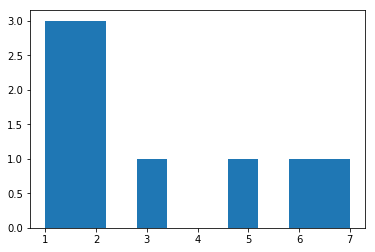

In [18]:
plt.hist(x1);

# 2. Gere dados randômicos e desenhe o histograma para uma distribuição normal contendo 5000 pontos, que tem como média o valor 60 e como desvio padrão o valor 10.

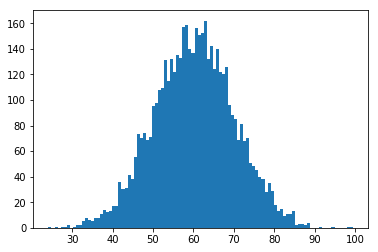

In [19]:
r1 = np.random.normal(loc=60, scale=10, size=5000)
plt.hist(r1, bins=100);

# 3. Gere dados randômicos e desenhe o histograma para 2 distribuições escolhidas por você (exceto a dist. normal/gaussiana) a partir da figura a seguir:

## 3.1 Geométrica

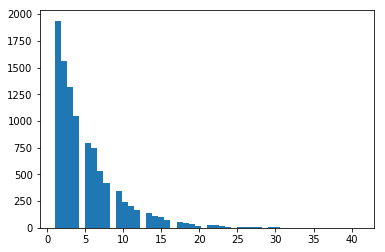

In [20]:
r2 = np.random.geometric(p=0.2, size=10000)
plt.hist(r2, bins=50);

## 3.2 Log Normal

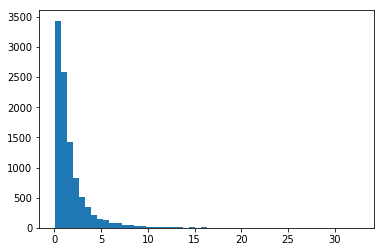

In [21]:
r3 = np.random.lognormal(size=10000)
plt.hist(r3, bins=50);

# 4. Altere os parâmetros do Gradiente Descendente do notebook 04-Gradiente Descendente.ipynb, para que a diferença entre o valor da métrica de erro do Gradiente Descendente e o valor da métrica de erro da Regressão Linear do Scikit Learn seja menor do que 0.01. Obtenha os coeficientes da regressão linear e o valor do erro. Dica: aumentar muito o número de iterações do Gradiente Descendente.

In [22]:
# y = b0 + b1 * x
# b1 é a inclinação, b0 é y-intercept
def compute_error_for_line_given_points(b0, b1, x, y):
    totalError = np.sum((y - (b1 * x + b0)) ** 2)
    return totalError / float(len(y))

def step_gradient(b0_current, b1_current, x, y, learning_rate):
    N = float(len(y))
    b0_gradient = 2/N * np.sum(-(y - ((b1_current * x) + b0_current)))
    b1_gradient = 2/N * np.sum(-x * (y - ((b1_current * x) + b0_current)))
    new_b0 = b0_current - (learning_rate * b0_gradient)
    new_b1 = b1_current - (learning_rate * b1_gradient)
    return new_b0, new_b1

def gradient_descent_runner(x, y, b0, b1, learning_rate, num_iterations):
    for _ in range(num_iterations):
        b0, b1 = step_gradient(b0, b1, x, y, learning_rate)
    return b0, b1

def run(x, y, initial_b0, initial_b1, learning_rate, num_iterations):
    print("Inicia com b0 = {}, b1 = {}, error = {}".format(initial_b0, initial_b1, compute_error_for_line_given_points(initial_b0, initial_b1, x, y)))  
    print("Executando...")
    b0, b1 = gradient_descent_runner(x, y, initial_b0, initial_b1, learning_rate, num_iterations)
    print("Após {} iterações, obtemos b0 = {}, b1 = {}, error = {}".format(num_iterations, b0, b1, compute_error_for_line_given_points(b0, b1, x, y)))

In [23]:
points = np.genfromtxt("data.csv", delimiter=",")

In [24]:
%%time
x = points[:, 0]
y = points[:, 1]
learning_rate = 0.0001
initial_b0 = 0 # y-intercept inicial
initial_b1 = 0 # inclinação inicial
num_iterations = 380000
erro_grad = run(x, y, initial_b0, initial_b1, learning_rate, num_iterations)

Inicia com b0 = 0, b1 = 0, error = 5565.107834483214
Executando...
Após 380000 iterações, obtemos b0 = 7.538752305491895, b1 = 1.3313202257964445, error = 110.2651057876494
CPU times: user 21.9 s, sys: 9.25 ms, total: 21.9 s
Wall time: 21.9 s


## Scikit Learn Results

In [25]:
%%time
model = linear_model.LinearRegression()
X = [ [i] for i in x ] 
model.fit(X, y)
b0, b1 = model.intercept_, model.coef_
y_pred = model.predict(X)
erro_regre = compute_error_for_line_given_points(b0, b1, x, y)
print("b0 = {}, b1 = {}, error = {}".format(b0, b1, erro_regre))

b0 = 7.991020982270399, b1 = [1.32243102], error = 110.25738346621316
CPU times: user 29.8 ms, sys: 3.89 ms, total: 33.7 ms
Wall time: 509 ms


## 4.1 O que ocorre quando você aumenta o valor de learning_rate para 0.01?

In [26]:
%%time
x = points[:, 0]
y = points[:, 1]
learning_rate = 0.01
initial_b0 = 0 # y-intercept inicial
initial_b1 = 0 # inclinação inicial
num_iterations = 380000
run(x, y, initial_b0, initial_b1, learning_rate, num_iterations)

Inicia com b0 = 0, b1 = 0, error = 5565.107834483214
Executando...


/home/yaagocruuz/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:32: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims)
/home/yaagocruuz/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in double_scalars
  if sys.path[0] == '':


Após 380000 iterações, obtemos b0 = nan, b1 = nan, error = nan
CPU times: user 22 s, sys: 8.06 ms, total: 22 s
Wall time: 22.1 s


## 4.2 Que valores de parâmetros podem ser usados com sucesso para obter um valor satisfatório para a métrica de erro ao usar um valor de learning_rate igual a 0.01

In [27]:
%%time
x = points[:, 0]
y = points[:, 1]
learning_rate = 0.01
initial_b0 = 0 # y-intercept inicial
initial_b1 = 0 # inclinação inicial
num_iterations = 89
run(x, y, initial_b0, initial_b1, learning_rate, num_iterations)

Inicia com b0 = 0, b1 = 0, error = 5565.107834483214
Executando...
Após 89 iterações, obtemos b0 = 5.797395039524365e+148, b1 = 2.9496234602465667e+150, error = 2.1688803463679651e+304
CPU times: user 8.11 ms, sys: 4 µs, total: 8.11 ms
Wall time: 7.5 ms


# 5. Use o gradiente descendente com boa precisão para:

## 5.1 Criar um modelo linear a partir dos seguintes dados:

In [28]:
# y = b0 + b1 * x
# b1 é a inclinação, b0 é y-intercept
def compute_error_for_line_given_points(b0, b1, x, y):
    totalError = np.sum((y - (b1 * x + b0)) ** 2)
    return totalError / float(len(y))

def step_gradient(b0_current, b1_current, x, y, learning_rate):
    N = float(len(y))
    b0_gradient = 2/N * np.sum(-(y - ((b1_current * x) + b0_current)))
    b1_gradient = 2/N * np.sum(-x * (y - ((b1_current * x) + b0_current)))
    new_b0 = b0_current - (learning_rate * b0_gradient)
    new_b1 = b1_current - (learning_rate * b1_gradient)
    return new_b0, new_b1

def gradient_descent_runner(x, y, b0, b1, learning_rate, num_iterations):
    for _ in range(num_iterations):
        b0, b1 = step_gradient(b0, b1, x, y, learning_rate)
    return b0, b1

def run(x, y, initial_b0, initial_b1, learning_rate, num_iterations):
    print("Inicia com b0 = {}, b1 = {}, error = {}".format(initial_b0, initial_b1, compute_error_for_line_given_points(initial_b0, initial_b1, x, y)))  
    print("Executando...")
    b0, b1 = gradient_descent_runner(x, y, initial_b0, initial_b1, learning_rate, num_iterations)
    print("Após {} iterações, obtemos b0 = {}, b1 = {}, error = {}".format(num_iterations, b0, b1, compute_error_for_line_given_points(b0, b1, x, y)))

In [33]:
points2 = np.array([[1400,245000], [1600,312000], [1700,279000], [1875,308000], [1100,199000],
                    [1550,219000], [2350,405000], [2450,324000], [1425,319000], [1700,255000]])


In [36]:
x = points2[:, 0]
y = points2[:, 1]
learning_rate = 0.0000000001
initial_b0 = 0 # y-intercept inicial
initial_b1 = 0 # inclinação inicial
num_iterations = 100000
b0_, b1_= gradient_descent_runner(x,y,initial_b0,initial_b1,learning_rate,num_iterations)

print("b0 = {} e b1 = {}".format(b0_,b1_))
print("formula => y = {} * x + {}".format(b1_,b0_))

b0 = 0.19052268188610638 e b1 = 164.14965135332437
formula => y = 164.14965135332437 * x + 0.19052268188610638


## Predizer o preço em Dólares de uma casa com área de 100 m2 (converta adequadamente as unidades de medida). 

In [37]:
preco_casa = (b1_ * (100/0.092903)) + b0_
print("Preço da casa com área de 100m2 = ${}".format(preco_casa))

Preço da casa com área de 100m2 = $176689.48080752132
